In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib
import numpy as np
from common import Fonts, Images, add_twitter_handle

In [2]:
year = "2023"

In [3]:
df_cum = pd.read_csv("golden_boot_" + year + ".csv", index_col=0)
df_cum = df_cum.iloc[0:14]
df_cum.columns = pd.to_datetime(df_cum.columns)
df_cum

,2023-03-25,2023-03-26,2023-03-27,2023-03-28,2023-03-29,2023-03-30,2023-03-31,2023-04-01,2023-04-02,2023-04-03,...,2023-10-06,2023-10-07,2023-10-08,2023-10-09,2023-10-10,2023-10-11,2023-10-12,2023-10-13,2023-10-14,2023-10-15
player,,,,,,,,,,,,,,,,,,,,,
Sophia Smith,0,1,1,1,1,1,1,4,4,4,...,11,11,11,11,11,11,11,11,11,11
Débora Cristiane de Oliveira,0,0,0,0,0,0,0,0,0,0,...,8,9,9,9,9,9,9,9,9,9
Kerolin Nicoli Israel Ferraz,0,0,0,0,0,0,0,1,1,1,...,9,9,9,9,9,9,9,9,9,9
Ashley Hatch,0,0,0,0,0,0,0,2,2,2,...,9,9,9,9,9,9,9,9,9,9
Alex Morgan,1,1,1,1,1,1,1,3,3,3,...,6,6,6,6,6,6,6,6,6,7
Morgan Weaver,0,1,1,1,1,1,1,1,1,1,...,7,7,7,7,7,7,7,7,7,7
Lynn Williams,0,1,1,1,1,1,1,1,1,1,...,7,7,7,7,7,7,7,7,7,7
Jaedyn Shaw,1,1,1,1,1,1,1,2,2,2,...,5,5,5,5,5,5,5,5,5,6
Tyler Lussi,0,0,0,0,0,0,0,0,0,0,...,5,5,5,5,5,5,5,5,5,6


<Figure size 1440x1440 with 0 Axes>

<Figure size 8000x8000 with 0 Axes>

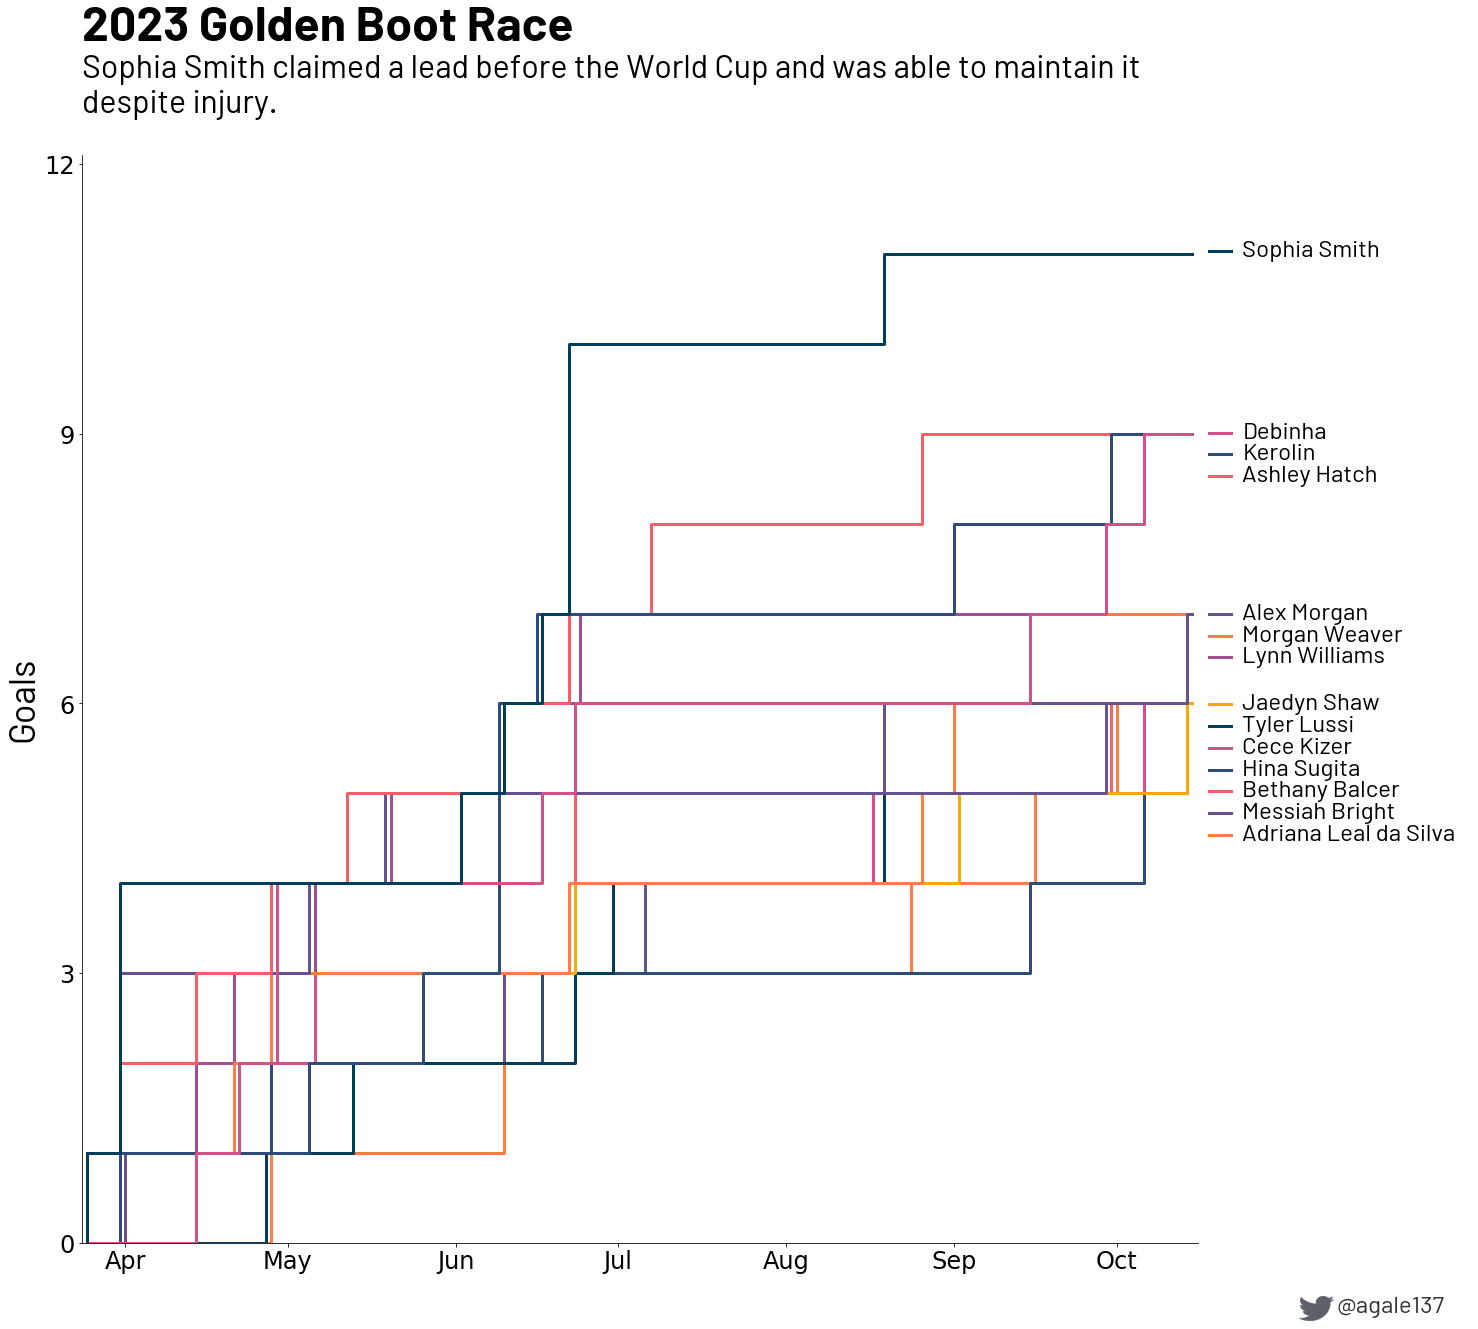

In [11]:
# General
plt.clf()
plt.rcParams["figure.figsize"] = (20, 20)
plt.figure(dpi=400, facecolor="white")
fig, ax = plt.subplots()
fig.patch.set_facecolor("white")

# Colors
n_colors = 8
colors = [
    "#003f5c",
    "#d45087",
    "#2f4b7c",
    "#f95d6a",
    "#665191",
    "#ff7c43",
    "#a05195",
    "#ffa600",
]


def clean_name(n):
    if "Kerolin" in n:
        return "Kerolin"
    elif "Cristiane" in n:
        return "Debinha"
    return n


# Plot data
count = {}
for i, (name, row) in enumerate(df_cum.iterrows()):
    ax.step(
        df_cum.columns,
        row,
        label=i,
        linewidth=3,
        color=colors[i % n_colors],
        zorder=-1 * i,
    )

    offset = 0
    goals = row[-1]
    if goals in count:
        offset = count[goals]
        count[goals] = offset + 1
    else:
        count[goals] = 1

    y = row[-1] / 12 - offset * 0.02 - 0.005

    ax.text(
        1.04,
        y,
        clean_name(name),
        transform=ax.transAxes,
        color="black",
        fontsize=24,
        fontproperties=Fonts.BARLOW,
        fontweight="bold",
        va="center",
        ha="left",
    )

    plt.plot(
        [1.01, 1.03],
        [y, y],
        transform=ax.transAxes,
        linewidth=3,
        color=colors[i % n_colors],
        clip_on=False,
    )

# Title
plt.title(
    year + " Golden Boot Race",
    fontproperties=Fonts.BARLOW_BOLD,
    size=48,
    ha="left",
    x=0,
    y=1.1,
)
plt.suptitle(
    "Sophia Smith claimed a lead before the World Cup and was able to maintain it\ndespite injury.",
    fontproperties=Fonts.BARLOW,
    size=32,
    ha="left",
    x=0.125,
    y=0.95,
)

# Axes
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis="both", which="major", labelsize=24)
ax.set_ylim(0, 12.1)
ax.set_yticks([0, 3, 6, 9, 12])
ax.set_xlim([datetime.date(2023, 3, 24), datetime.date(2023, 10, 16)])
plt.ylabel("Goals", fontproperties=Fonts.BARLOW, size=36)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))

add_twitter_handle(fig, x=0.97, y=0.07, fs=24, w=0.02)

# Save image
plt.savefig("golden_boot_" + year + ".png", bbox_inches="tight", pad_inches=0.5)